# ***Paper1_2500_DT & KNN*** ⏱





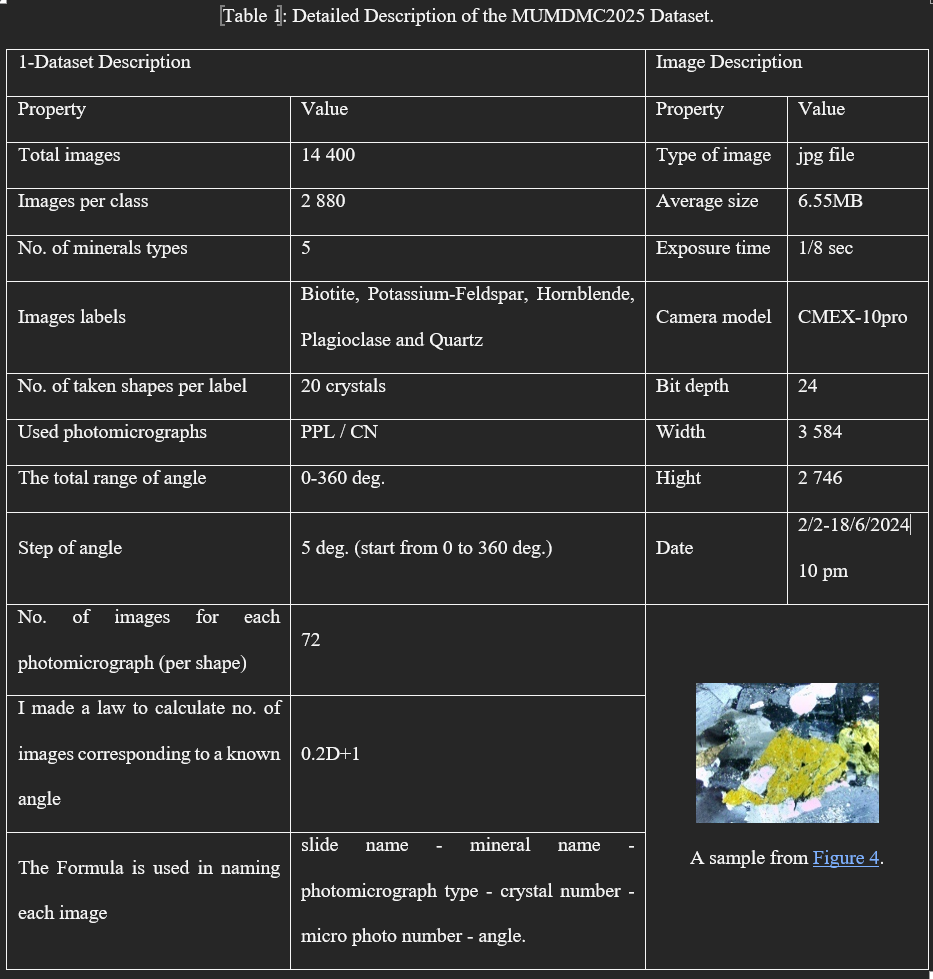

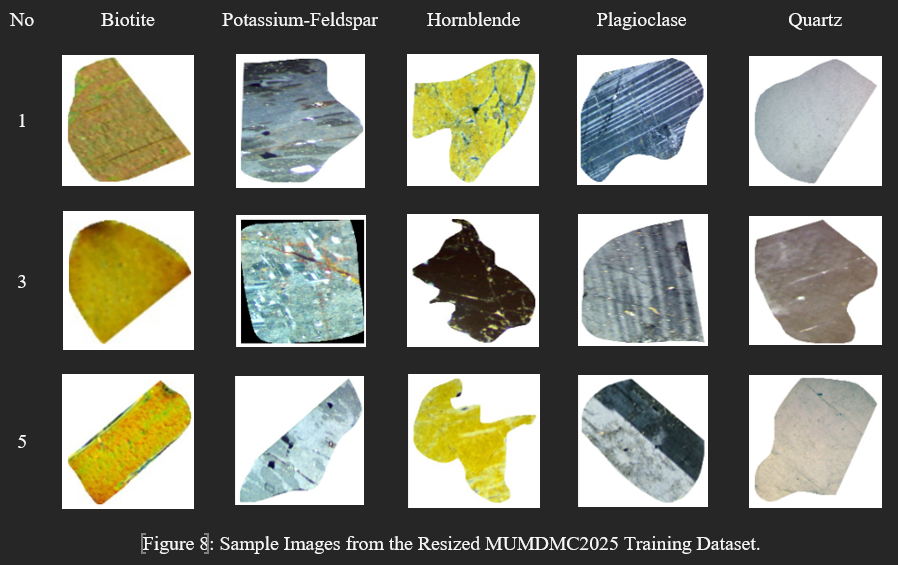

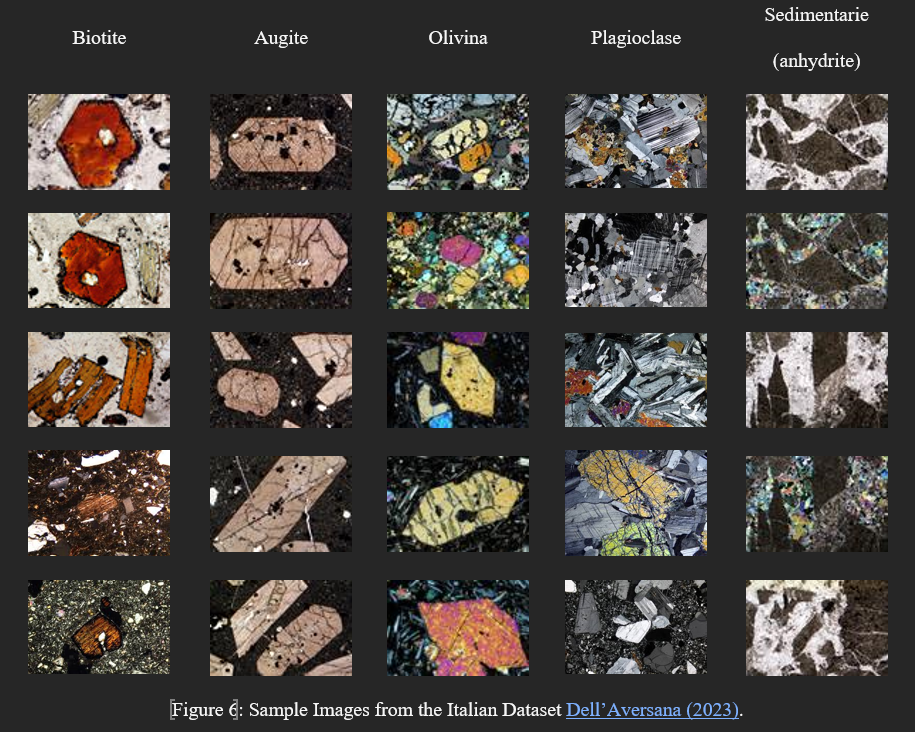

# **General**

In [ ]:
#  load autotime

!pip install ipython-autotime
%load_ext autotime


In [ ]:
# mount drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive
time: 42.5 s (started: 2024-12-22 10:46:35 +00:00)


In [ ]:
from google.colab import files

def save_and_download_plot(filename):
  # save the PNG and PDF files
  plt.savefig(f'{filename}.png')
  plt.savefig(f'{filename}.pdf')
  # Download the PNG and PDF files
  files.download(f'{filename}.png')
  files.download(f'{filename}.pdf')

time: 910 µs (started: 2024-12-22 10:47:28 +00:00)


In [ ]:


import os

# Directory path to the dataset
dataset_path = "/content/drive/MyDrive/Colab Notebooks/MscModelTrain/MLModel/images/DataSet2500_500"
#dataset_path = '/content/drive/MyDrive/Colab Notebooks/MscModelTrain/MLModel/otherDatasets/ItalyDataset'

folder_names = [f for f in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, f))]
class_names = folder_names
#print(class_names)

In [ ]:

# Step 1: Resize the Images

import cv2
import os
import numpy as np


# Define image size
image_size = (150, 150)

# Load and preprocess images
def load_and_preprocess_images(dataset_path, image_size):
    images = []
    labels = []
    #class_names = ['Biotite', 'Quartz', 'Hornblende', 'Plagioclase', 'Potassium-Feldspar']
    class_names = folder_names
    for class_name in class_names:
        class_dir = os.path.join(dataset_path, class_name)
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, image_size)
            images.append(img)
            labels.append(class_names.index(class_name))
    return np.array(images), np.array(labels)

# Load and preprocess images
X, y = load_and_preprocess_images(dataset_path, image_size)


time: 44.9 s (started: 2024-12-22 10:48:23 +00:00)


In [ ]:
X = X / 255.0  # Normalize images

time: 582 ms (started: 2024-12-22 10:49:49 +00:00)


In [ ]:
# class distribution

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate class distribution
class_counts = {}
for label in y:
    class_name = class_names[label]
    if class_name not in class_counts:
        class_counts[class_name] = 0
    class_counts[class_name] += 1

# Create a bar plot of the class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Class Distribution")
save_and_download_plot("class_distribution")
plt.show()

# Print the class distribution
for class_name, count in class_counts.items():
    print(f"Class: {class_name}, Count: {count}")

In [ ]:
#  the encoded labels
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels
y_encoded = label_encoder.fit_transform(y)

# Print the encoded labels
print(y_encoded)

# Print the mapping between original and encoded labels
for original_label, encoded_label in zip(class_names, label_encoder.classes_):
    print(f"Original label: {original_label}, Encoded label: {encoded_label}")

In [ ]:
#the encoded labels  in a colored table
import pandas as pd

# Create a DataFrame from the original and encoded labels
label_mapping = pd.DataFrame({'Original Label': class_names, 'Encoded Label': label_encoder.classes_})

# Function to style the DataFrame with color gradients
def color_gradient(val):
    color = '#%02x%02x%02x' % (int(255 * (1 - val/len(class_names))), int(255 * val/len(class_names)), 0)  # Gradient from red to green
    return 'background-color: %s' % color

# Style the DataFrame
styled_df = label_mapping.style.applymap(color_gradient, subset=['Encoded Label'])


# Display the styled DataFrame
styled_df

time: 23.6 ms (started: 2024-12-01 13:32:28 +00:00)


# **DT**

 1: Predicted Class
 2: accuracy, precision, recall, f1-score, then plot them with a bar plot performance metrics).
 3: confusion matrix.
 4: ROC, AUC curve.
 5: Error Analysis.

In [ ]:


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X and y_encoded are defined from the previous code

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.reshape(X.shape[0], -1), y_encoded, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42) #default parameters
clf.fit(X_train, y_train)


In [ ]:

# Make predictions on the test set
y_pred = clf.predict(X_test)


time: 105 ms (started: 2024-12-22 10:53:34 +00:00)


In [ ]:

# Calculate the distribution of predicted classes using np.unique
unique_classes, counts = np.unique(y_pred, return_counts=True)  # Calculate class counts
predicted_class_counts = dict(zip(unique_classes, counts))  # Create a dictionary mapping classes to counts

# Create a bar plot of the predicted class distribution with counts over each bar
plt.figure(figsize=(8, 6))
bars = sns.barplot(x=list(predicted_class_counts.keys()), y=list(predicted_class_counts.values()))
plt.xlabel("Predicted Class")
plt.ylabel("Number of Images")
plt.title("DT, Predicted Class Distribution")

# Add counts on top of each bar
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

save_and_download_plot("DT, predicted_class_distribution")
plt.show()

In [ ]:

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Create a dictionary to store the metrics
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1
}

# Convert metrics to percentage
metrics_percentage = {metric: value * 100 for metric, value in metrics.items()}

# Create a bar plot of the performance metrics
plt.figure(figsize=(8, 6))
sns.barplot(x=list(metrics_percentage.keys()), y=list(metrics_percentage.values()))
plt.xlabel("Metrics", fontsize=12)
plt.ylim(0, 100)  # Set y-axis limit to 100%
plt.ylabel("Percentage (%)", fontsize=12)
plt.title("DT, Performance Metrics", fontsize=14)

# Add percentage labels on top of the bars
for i, v in enumerate(metrics_percentage.values()):
    plt.text(i, v, f"{v:.2f}%", ha='center', va='bottom')

save_and_download_plot("dt, performance_metrics")
plt.show()

# Print the performance metrics
for metric, value in metrics_percentage.items():
    print(f"{metric}: {value:.2f}%")

In [ ]:

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.title("DT, Confusion Matrix", fontsize=14)
save_and_download_plot("dt, confusion_matrix")
plt.show()

# Convert label_encoder.classes_ to a list of strings
target_names = [str(cls) for cls in label_encoder.classes_]  # Convert to strings

print(classification_report(y_test, y_pred, target_names=target_names)) # Use target_names

In [ ]:
from sklearn.preprocessing import label_binarize # Import label_binarize

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(label_encoder.classes_)

y_prob = clf.predict_proba(X_test)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_prob[:, i], pos_label=i) #Changed here
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {label_encoder.classes_[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('DT, ROC Curve', fontsize=14)
plt.legend(loc="lower right")
save_and_download_plot("dt, roc_curve")
plt.show()


# Compute micro-average ROC curve and ROC area
# Convert y_test to one-hot encoded format
y_test_onehot = label_binarize(y_test, classes=label_encoder.classes_)

fpr["micro"], tpr["micro"], _ = roc_curve(y_test_onehot.ravel(), y_prob.ravel()) #Changed here
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure(figsize=(8, 6))
plt.plot(fpr["micro"], tpr["micro"], label=f'micro-average ROC curve (area = {roc_auc["micro"]:.2f})', color='deeppink', linestyle=':', linewidth=4)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('DT, Micro-averaged ROC Curve', fontsize=14)
plt.legend(loc="lower right")
save_and_download_plot("dt, micro_averaged_roc_curve")
plt.show()

In [ ]:

from sklearn.preprocessing import label_binarize
from collections import Counter

# Assuming you have y_test and y_pred defined
misclassifications = []
for i in range(len(y_test)):
    if y_test[i] != y_pred[i]:
        misclassifications.append((y_test[i], y_pred[i]))  # Store true and predicted labels

# Count the occurrences of each misclassification
misclassifications_counts = Counter(misclassifications)

# Convert the counts to the format expected by your plotting code
misclassifications = [(true_class, predicted_class, count)
                     for (true_class, predicted_class), count in misclassifications_counts.items()]



# Create a bar chart to visualize misclassifications with colors for each class
true_classes = [t for t, _, _ in misclassifications]
predicted_classes = [p for _, p, _ in misclassifications]
counts = [c for _, _, c in misclassifications]

# Assign a unique color to each true class
unique_true_classes = list(set(true_classes))
colors = plt.cm.get_cmap('tab10', len(unique_true_classes))

plt.figure(figsize=(8, 6))
bars = plt.bar(range(len(misclassifications)), counts, color=[colors(unique_true_classes.index(t)) for t in true_classes])

plt.xticks(range(len(misclassifications)), [f"{label_encoder.inverse_transform([t])[0]} -> {label_encoder.inverse_transform([p])[0]}" for t, p in zip(true_classes, predicted_classes)], rotation=45, ha='right')
plt.xlabel('Misclassifications')
plt.ylabel('Count')
plt.title('DT, Error Analysis - Misclassifications')

# Add counts on top of each bar
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count, ha='center', va='bottom')

# Create a legend for the colors
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=colors(i)) for i in range(len(unique_true_classes))]
plt.legend(legend_handles, [label_encoder.inverse_transform([t])[0] for t in unique_true_classes], title='True Classes')


plt.tight_layout()

# Save the plot as a PDF file
save_and_download_plot("dt, Error Analysis - Misclassifications with Colors")

# Display the plot
plt.show()

# **KNN**

KNN model with default parameters
1: distribution of predicted class with count over each bar.
2: accuracy, precision, recall, f1-score, then plot them with a bar plot with percentage (performance metrics).
3: confusion matrix.
4: ROC, AUC curve.
5: figure of Error Analysis with a color for each class with count over each bar.

In [ ]:

from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the KNN classifier with default parameters
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)


KNeighborsClassifier()

time: 180 ms (started: 2024-12-22 11:13:10 +00:00)


In [ ]:
# Make predictions on the test set
y_pred_knn = knn.predict(X_test)

time: 4.9 s (started: 2024-12-22 11:13:18 +00:00)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

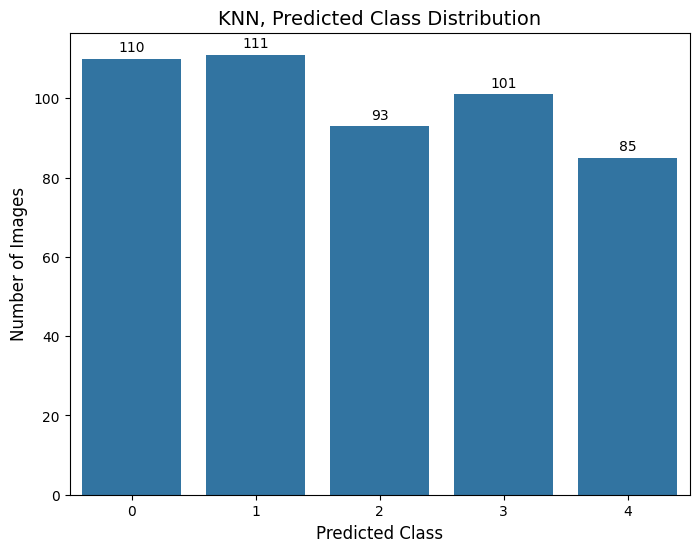

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

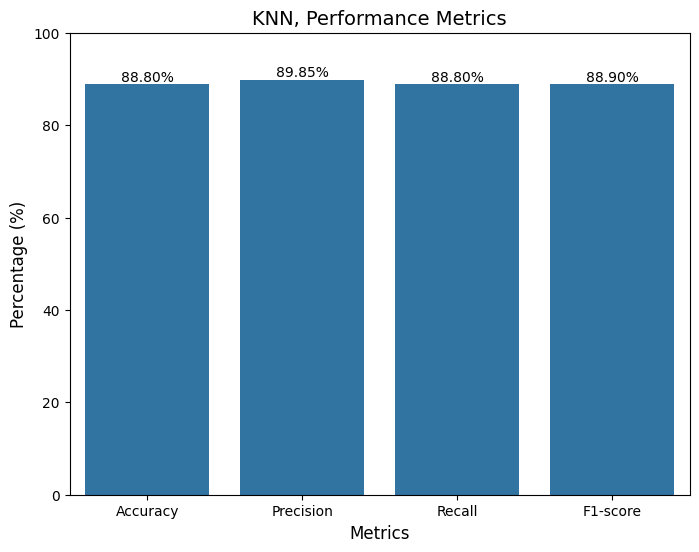

Accuracy: 88.80%
Precision: 89.85%
Recall: 88.80%
F1-score: 88.90%


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

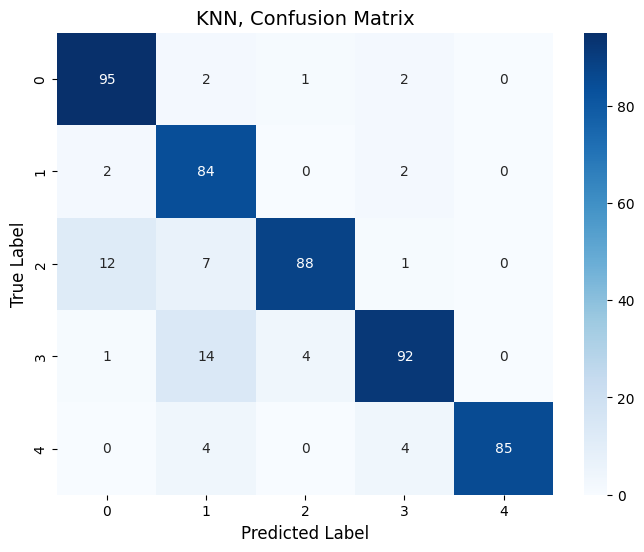

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

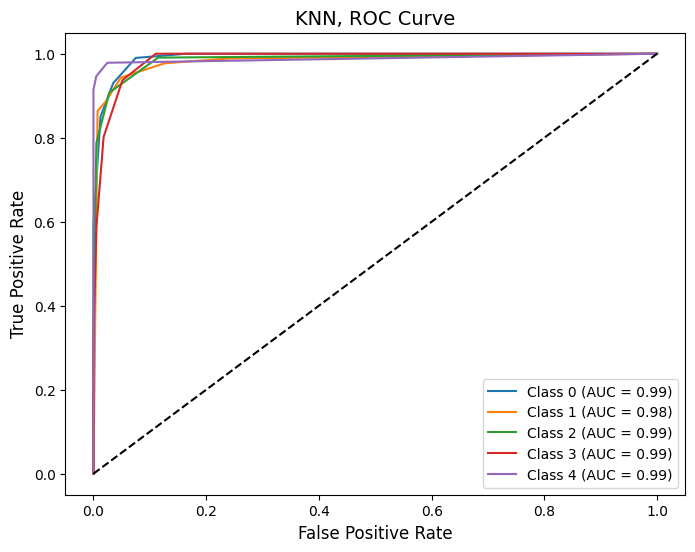

<ipython-input-25-cfe01bf02870>:104: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors_knn = plt.cm.get_cmap('tab10', len(unique_true_classes_knn))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

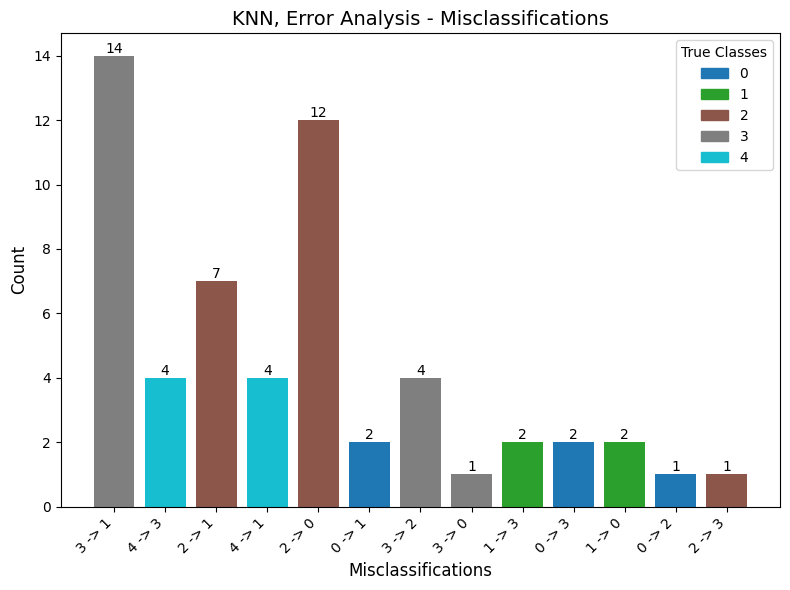

time: 11 s (started: 2024-12-22 11:18:18 +00:00)


In [ ]:


# 1. Predicted class distribution
predicted_class_counts_knn = {}
for label in y_pred_knn:
    class_name = label_encoder.inverse_transform([label])[0]
    if class_name not in predicted_class_counts_knn:
        predicted_class_counts_knn[class_name] = 0
    predicted_class_counts_knn[class_name] += 1

plt.figure(figsize=(8, 6))
bars = sns.barplot(x=list(predicted_class_counts_knn.keys()), y=list(predicted_class_counts_knn.values()))
plt.xlabel("Predicted Class", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)
plt.title("KNN, Predicted Class Distribution", fontsize=14)

for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
save_and_download_plot("knn, predicted_class_distribution")
plt.show()


# 2. Performance metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

metrics_knn = {
    'Accuracy': accuracy_knn,
    'Precision': precision_knn,
    'Recall': recall_knn,
    'F1-score': f1_knn
}

metrics_percentage_knn = {metric: value * 100 for metric, value in metrics_knn.items()}

plt.figure(figsize=(8, 6))
sns.barplot(x=list(metrics_percentage_knn.keys()), y=list(metrics_percentage_knn.values()))
plt.ylim(0, 100)
plt.xlabel("Metrics", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.title("KNN, Performance Metrics", fontsize=14)
for i, v in enumerate(metrics_percentage_knn.values()):
    plt.text(i, v, f"{v:.2f}%", ha='center', va='bottom')
save_and_download_plot("knn, performance_metrics")
plt.show()

for metric, value in metrics_percentage_knn.items():
    print(f"{metric}: {value:.2f}%")


# 3. Confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.title("KNN, Confusion Matrix", fontsize=14)
save_and_download_plot("knn, confusion_matrix")
plt.show()


# 4. ROC and AUC
y_prob_knn = knn.predict_proba(X_test)
fpr_knn = dict()
tpr_knn = dict()
roc_auc_knn = dict()
n_classes = len(label_encoder.classes_)

for i in range(n_classes):
    fpr_knn[i], tpr_knn[i], _ = roc_curve(y_test, y_prob_knn[:, i], pos_label=i)
    roc_auc_knn[i] = auc(fpr_knn[i], tpr_knn[i])

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr_knn[i], tpr_knn[i], label=f"Class {label_encoder.classes_[i]} (AUC = {roc_auc_knn[i]:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('KNN, ROC Curve', fontsize=14)
plt.legend(loc="lower right")
save_and_download_plot("knn, roc_curve")
plt.show()


# 5. Error Analysis
misclassifications_knn = []
for i in range(len(y_test)):
    if y_test[i] != y_pred_knn[i]:
        misclassifications_knn.append((y_test[i], y_pred_knn[i]))

misclassifications_counts_knn = Counter(misclassifications_knn)
misclassifications_knn = [(true_class, predicted_class, count)
                     for (true_class, predicted_class), count in misclassifications_counts_knn.items()]

true_classes_knn = [t for t, _, _ in misclassifications_knn]
predicted_classes_knn = [p for _, p, _ in misclassifications_knn]
counts_knn = [c for _, _, c in misclassifications_knn]
unique_true_classes_knn = list(set(true_classes_knn))
colors_knn = plt.cm.get_cmap('tab10', len(unique_true_classes_knn))

plt.figure(figsize=(8, 6))
bars_knn = plt.bar(range(len(misclassifications_knn)), counts_knn, color=[colors_knn(unique_true_classes_knn.index(t)) for t in true_classes_knn])
plt.xticks(range(len(misclassifications_knn)), [f"{label_encoder.inverse_transform([t])[0]} -> {label_encoder.inverse_transform([p])[0]}" for t, p in zip(true_classes_knn, predicted_classes_knn)], rotation=45, ha='right')
plt.xlabel('Misclassifications', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('KNN, Error Analysis - Misclassifications', fontsize=14)

for bar, count in zip(bars_knn, counts_knn):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count, ha='center', va='bottom')

legend_handles_knn = [plt.Rectangle((0, 0), 1, 1, color=colors_knn(i)) for i in range(len(unique_true_classes_knn))]
plt.legend(legend_handles_knn, [label_encoder.inverse_transform([t])[0] for t in unique_true_classes_knn], title='True Classes')
plt.tight_layout()
save_and_download_plot("knn, Error Analysis - Misclassifications with Colors")
plt.show()

In [ ]:
# @title




# Calculate the distribution of predicted classes
predicted_class_counts = {}
for label in y_pred:
    class_name = label_encoder.inverse_transform([label])[0]
    if class_name not in predicted_class_counts:
        predicted_class_counts[class_name] = 0
    predicted_class_counts[class_name] += 1

#1: distribution of predicted class with count over each bar.
plt.figure(figsize=(8, 6))
bars = sns.barplot(x=list(predicted_class_counts.keys()), y=list(predicted_class_counts.values()))
plt.xlabel("Predicted Class")
plt.ylabel("Number of Images")
plt.title("KNN, Predicted Class Distribution")

# Add counts on top of each bar
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

#save_and_download_plot("KNN, predicted_class_distribution")
plt.show()


#2: accuracy, precision, recall, f1-score
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Create a dictionary to store the metrics
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1
}

# Convert metrics to percentage
metrics_percentage = {metric: value * 100 for metric, value in metrics.items()}

# Create a bar plot of the performance metrics
plt.figure(figsize=(8, 6))
sns.barplot(x=list(metrics_percentage.keys()), y=list(metrics_percentage.values()))
plt.xlabel("Metrics")
plt.ylabel("Percentage")
plt.title("KNN, Performance Metrics")

# Add percentage labels on top of the bars
for i, v in enumerate(metrics_percentage.values()):
    plt.text(i, v, f"{v:.2f}%", ha='center', va='bottom')

#save_and_download_plot("KNN, performance_metrics")
plt.show()

# Print the performance metrics
for metric, value in metrics_percentage.items():
    print(f"{metric}: {value:.2f}%")

#3: confusion matrix
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("KNN, Confusion Matrix")
#save_and_download_plot("KNN, confusion_matrix")
plt.show()


#4: ROC, AUC curve
# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(label_encoder.classes_)
y_prob = knn.predict_proba(X_test)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_prob[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {label_encoder.classes_[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN, ROC Curve')
plt.legend(loc="lower right")
#save_and_download_plot("KNN, roc_curve")
plt.show()

#5: figure of Error Analysis
misclassifications = []
for i in range(len(y_test)):
    if y_test[i] != y_pred[i]:
        misclassifications.append((y_test[i], y_pred[i]))

misclassifications_counts = Counter(misclassifications)
misclassifications = [(true_class, predicted_class, count)
                     for (true_class, predicted_class), count in misclassifications_counts.items()]

true_classes = [t for t, _, _ in misclassifications]
predicted_classes = [p for _, p, _ in misclassifications]
counts = [c for _, _, c in misclassifications]

unique_true_classes = list(set(true_classes))
colors = plt.cm.get_cmap('tab10', len(unique_true_classes))

plt.figure(figsize=(8, 6))
bars = plt.bar(range(len(misclassifications)), counts, color=[colors(unique_true_classes.index(t)) for t in true_classes])

plt.xticks(range(len(misclassifications)), [f"{label_encoder.inverse_transform([t])[0]} -> {label_encoder.inverse_transform([p])[0]}" for t, p in zip(true_classes, predicted_classes)], rotation=45, ha='right')
plt.xlabel('Misclassifications')
plt.ylabel('Count')
plt.title('KNN, Error Analysis - Misclassifications')

for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count, ha='center', va='bottom')

legend_handles = [plt.Rectangle((0, 0), 1, 1, color=colors(i)) for i in range(len(unique_true_classes))]
plt.legend(legend_handles, [label_encoder.inverse_transform([t])[0] for t in unique_true_classes], title='True Classes')

plt.tight_layout()
#save_and_download_plot("KNN, Error Analysis - Misclassifications with Colors")
plt.show()

# **KNN VS. DT**

In [ ]:

import matplotlib.pyplot as plt
import numpy as np


# Create a bar plot for comparison
knn_accuracy = accuracy
knn_precision = precision
knn_recall = recall
knn_f1 = f1
# Replace with your actual Decision Tree metrics
dt_accuracy = 0.5238095238095238
dt_precision = 0.38888888888888884
dt_recall = 0.5238095238095238
dt_f1 = 0.42639933166248956


metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
knn_values = [knn_accuracy, knn_precision, knn_recall, knn_f1]
dt_values = [dt_accuracy, dt_precision, dt_recall, dt_f1]

x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, knn_values, width, label='KNN')
rects2 = ax.bar(x + width/2, dt_values, width, label='Decision Tree')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('KNN vs. DT Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Add value labels above each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.ylim(0, 1)  # Set y-axis limits to be between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

save_and_download_plot("KNN vs. DT Performance Comparison")

plt.show()

